In [13]:
import argparse
from nyuv2_torch_ds_adapter import nyudepthv2, TorchDataset
data, args = None, argparse.Namespace()
args.truncate_testset = False
# args.target_size = (64, 64)
args.target_size = (640, 480)
args.out_fold_ratio = 1
args.is_maxim = False
nyuv2_ds = nyudepthv2(
            data_path="/media/master/text/cv_data/nyuv2/nyu_data/data",
            filenames_path="/media/master/text/cv_data/nyuv2/nyu_data/data",
            args=args,
            is_train=True,
            crop_size=args.target_size,
            scale_size=None,
            fold_ratio=args.out_fold_ratio,
        )
ds = TorchDataset(nyuv2_ds)

Dataset: NYU Depth V2
# of train images: 50688


In [14]:
x=next(iter(ds))

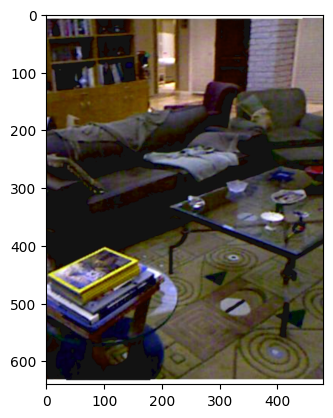

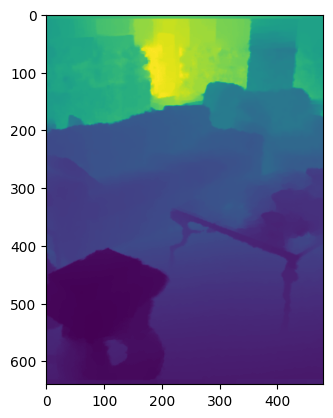

In [16]:
import matplotlib.pyplot as plt

img,depth=x[0],x[1]
plt.imshow(img)
plt.show()
plt.imshow(depth)
plt.show()

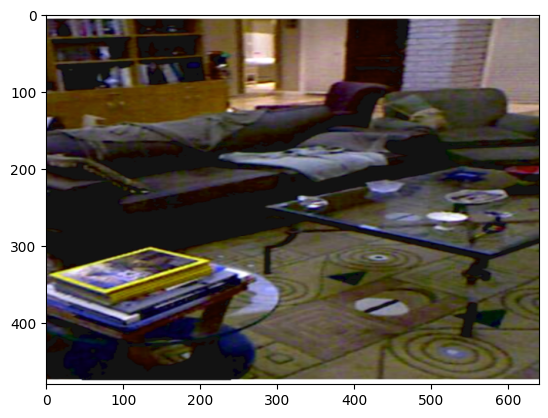

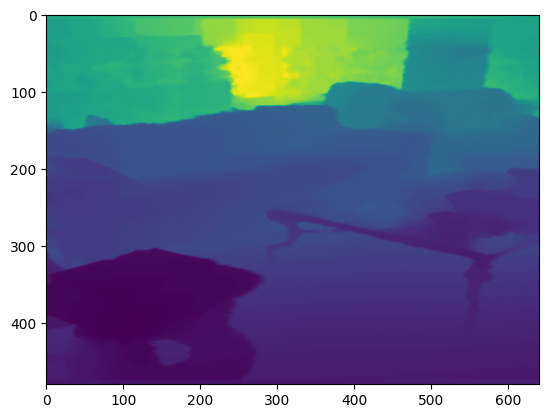

In [19]:
import cv2
self=nyuv2_ds
crop_size=args.target_size
# if crop_size[0] > 480:
#     scale_size = (int(crop_size[0] * 640 / 480), crop_size[0])

self.scale_size = scale_size

# target_size = (self.scale_size[0], self.scale_size[1])
target_size = args.target_size
image = cv2.resize(img, target_size)
depth = cv2.resize(depth, target_size)
plt.imshow(image)
plt.show()
plt.imshow(depth)
plt.show()